In [3]:
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
import pylab
import numpy as np
import matplotlib.pyplot as plt
import math

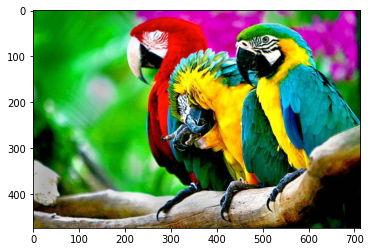

In [4]:
%matplotlib inline
img = imread('parrots.jpg')
pylab.imshow(img)

In [5]:
imgFloat = img_as_float(img)
r = imgFloat[:,:,0].ravel()
g = imgFloat[:,:,1].ravel()
b = imgFloat[:,:,2].ravel()
rgb = np.transpose(np.vstack((r,g,b)))


In [6]:
km = KMeans(init='k-means++', random_state=241)
km.fit(rgb)
cl = km.labels_
colors_avg = km.cluster_centers_
print(colors_avg)

[[0.95436309 0.82764789 0.04368503]
 [0.09496347 0.63495468 0.0661469 ]
 [0.78531881 0.82210694 0.79452457]
 [0.05381602 0.11710318 0.04986062]
 [0.77584035 0.0908823  0.68937042]
 [0.44942445 0.66358353 0.43590051]
 [0.04633564 0.54972962 0.59402973]
 [0.61162419 0.2132079  0.06192829]]


In [7]:
clImg = np.reshape(cl, (-1, 713))
imgInew = np.copy(imgFloat)

0.9882352941176471 0.8431372549019608 0.01568627450980392
0.054901960784313725 0.6431372549019607 0.023529411764705882
0.792156862745098 0.8274509803921568 0.788235294117647
0.011764705882352941 0.07058823529411765 0.011764705882352941
0.788235294117647 0.01568627450980392 0.7058823529411764
0.44313725490196076 0.6588235294117647 0.43529411764705883
0.0196078431372549 0.5647058823529412 0.5882352941176471
0.5568627450980392 0.22745098039215686 0.023529411764705882


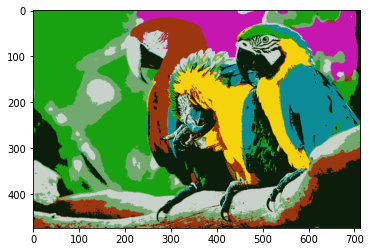

In [8]:
for cluster in range(0, km.n_clusters):
    mean_r = np.median(imgInew[:, :, 0][clImg == cluster])
    mean_g = np.median(imgInew[:, :, 1][clImg == cluster])
    mean_b = np.median(imgInew[:, :, 2][clImg == cluster])
    print(mean_r, mean_g, mean_b)

    imgInew[clImg == cluster] = colors_avg[cluster]
    plt.imshow(imgInew)

[0.9543630896497259, 0.8276478887932056, 0.0436850348853991]
[0.09496346773904907, 0.6349546802144379, 0.06614690488460162]
[0.7853188094498309, 0.8221069437751993, 0.7945245739725582]
[0.05381602455973988, 0.11710318378049339, 0.04986061607800871]
[0.7758403485529166, 0.09088230078350296, 0.6893704209826687]
[0.44942444855655805, 0.6635835274215245, 0.4359005099602977]
[0.046335635095893724, 0.5497296190579419, 0.5940297280887975]
[0.6116241904001414, 0.21320790080736907, 0.06192828941532616]


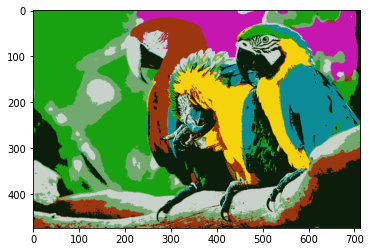

In [9]:
imgNew1 = np.copy(imgFloat)
for cluster in range(0, km.n_clusters):
    median_r = np.median(imgInew[:, :, 0][clImg == cluster])
    median_g = np.median(imgInew[:, :, 1][clImg == cluster])
    median_b = np.median(imgInew[:, :, 2][clImg == cluster])
    print([median_r, median_g, median_b])

    imgNew1[clImg == cluster] = [median_r, median_g, median_b]
    plt.imshow(imgNew1)

In [11]:
def PSNR(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    psnr = 10 * math.log10(np.max(image1) / mse)
    return psnr

print(PSNR(imgFloat, imgInew))

18.46793344153749


13 21.060979434632863
14 21.36745782734163
15 21.644650808876264
16 21.90373360901246
17 22.16522617887597


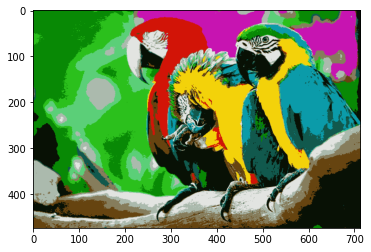

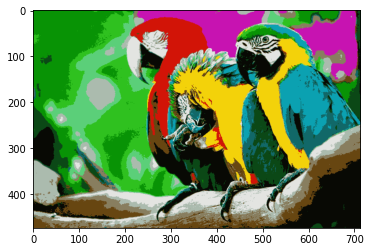

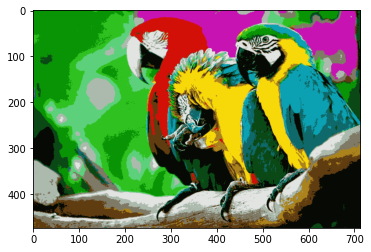

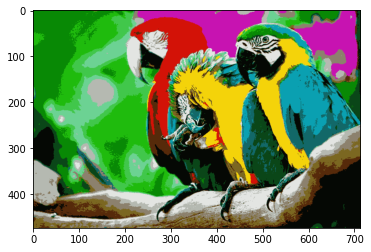

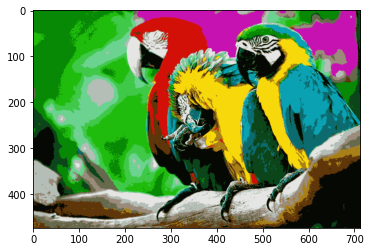

In [16]:
for i in range(13, 18):
    kM = KMeans(n_clusters = i, init = 'k-means++', random_state = 241)
    kM.fit(rgb)
    cl = kM.labels_
    colors_avg = kM.cluster_centers_
    cl_img = np.reshape(cl, (-1, 713))
    img_new = np.copy(imgFloat)
    for cluster in range(0, i):
        img_new[cl_img == cluster] = colors_avg[cluster]
    print (i, PSNR(imgFloat, img_new))
    plt.figure()
    plt.imshow(img_new)